In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Fonctions utiles

def S(p):  # 1 si i gagne j avec proba p et 0 sinon proba q (=1-p)
    if np.random.rand() < p:
        return 1
    else:
        return 0  # pour simuler Sij : S(p), et Sji : S(1-p)

def b(x):   #Fonction b
    return 1/(1+10**(-x/400))


def bcentree(x):    #Fonction b centrée
    return 2*b(x)-1


def Dn(Ri0, Rj0, K, p, N):  #Suite Dn = Rin-Rjn (Différence des elos entre deux joueurs)
    D = np.zeros(N)
    D[0] = Ri0 - Rj0
    for i in range(1, N):
        D[i] = D[i-1]+K*(S(p)-S(1-p)-(b(D[i-1])-b(-D[i-1])))
    return D


def ratingij(Ri0, Rj0, N, D):   #Suites Ri et Rj
    Ri = np.zeros(N)
    Ri[0] = Ri0
    Rj = np.zeros(N)
    Rj[0] = Rj0
    for i in range(1, N):
        Ri[i] = ((Ri0+Rj0) + D[i])/2
        Rj[i] = ((Ri0+Rj0) - D[i])/2
    return Ri, Rj

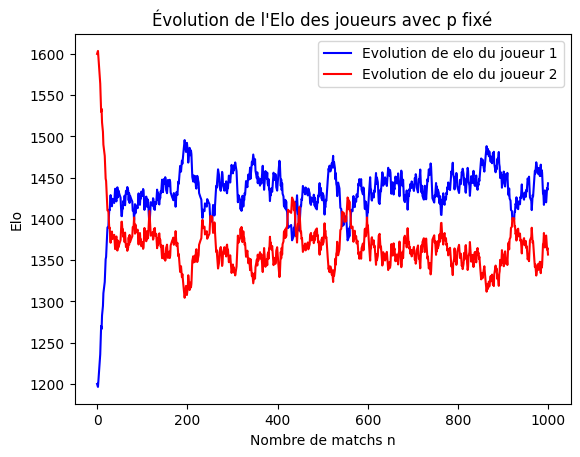

In [3]:
# Plot des rating avec p fixé

Ri0 = 1200
Rj0 = 1600
K = 20
p = 0.6
N = 1000
D = Dn(Ri0, Rj0, K, p, N)


plt.plot(ratingij(Ri0, Rj0, N, D)[0],'b')   #Graphe de l'évolution de elo du joueur 1 avec p fixé
plt.plot(ratingij(Ri0, Rj0, N, D)[1],'r')   #Graphe de l'évolution de elo du joueur 2 avec p fixé
plt.title("Évolution de l'Elo des joueurs avec p fixé")
plt.xlabel("Nombre de matchs n")
plt.ylabel("Elo")
plt.legend(["Evolution de elo du joueur 1","Evolution de elo du joueur 2"])
plt.show()

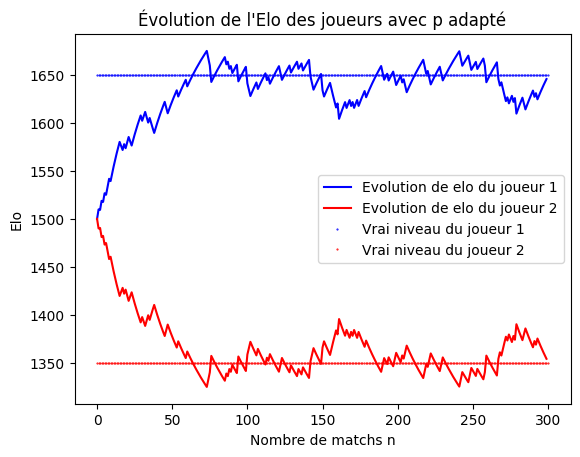

In [4]:
# Plot des rating avec p adaptée

Ri0 = 1500
Rj0 = 1500
DiffElo = 300   #Différence des "vrais" niveaux théoriques des joueurs
K = 20
p = b(DiffElo)
N = 300
D = Dn(Ri0, Rj0, K, p, N)

plt.plot(ratingij(Ri0, Rj0, N, D)[0],'b')   #Graphe de l'évolution de elo du joueur 1 avec p adapté
plt.plot(ratingij(Ri0, Rj0, N, D)[1],'r')   #Graphe de l'évolution de elo du joueur 2 avec p adapté
plt.plot(np.linspace(0,N,N),((Ri0 + Rj0 + DiffElo)/2)*np.ones(N),'.b', markersize = 1)  #"Vrai" niveau du joueur 1
plt.plot(np.linspace(0,N,N),((Ri0 + Rj0 - DiffElo)/2)*np.ones(N),'.r', markersize = 1)  #"Vrai" niveau du joueur 2
plt.title("Évolution de l'Elo des joueurs avec p adapté")
plt.xlabel("Nombre de matchs n")
plt.ylabel("Elo")
plt.legend(["Evolution de elo du joueur 1","Evolution de elo du joueur 2","Vrai niveau du joueur 1","Vrai niveau du joueur 2"])
plt.show()

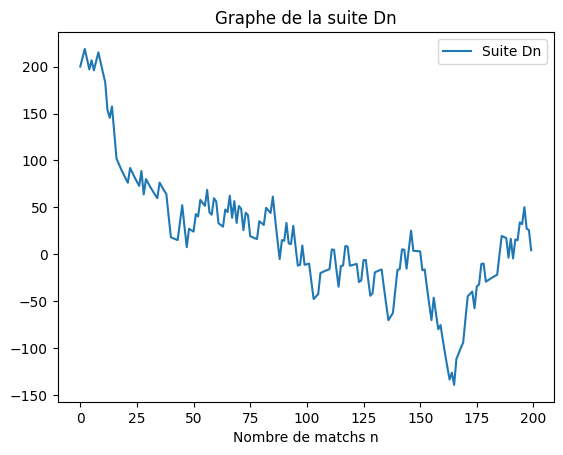

In [5]:
# Plot de Dn

Ri0 = 1400
Rj0 = 1200
K = 20
p = 0.5
N = 200
D = Dn(Ri0, Rj0, K, p, N)
X = np.arange(len(D))

plt.plot(X, D)
plt.title("Graphe de la suite Dn")
plt.xlabel("Nombre de matchs n")
plt.legend(["Suite Dn"])
plt.show()

In [6]:
# Fonction g et sa fonction inverse h 

def g(X, K):    #Fonction g
    return X - K*bcentree(X)


def vectXY(K, N):
    X = np.linspace(-800, 800, N)
    Y = np.zeros(N)
    for i in range(N):
        Y[i] = g(X[i], K)   #Y prend les valeurs de g(X)
    return X, Y


def h(Y, X, y):     #Fonction h (discretisée)
    N = len(Y)
    M = len(y) 
    H = np.zeros(M)  
    for j in range(M):  
        for i in range(N-1):
            if Y[i] <= y[j] < Y[i+1]:   #On inverse g aux points connus sur le maillage
                H[j] = X[i]
    H[-1] = X[-1]
    return H


K = 20
N = 500
X, Y = vectXY(K, N)
I = np.linspace(-770,770,N)

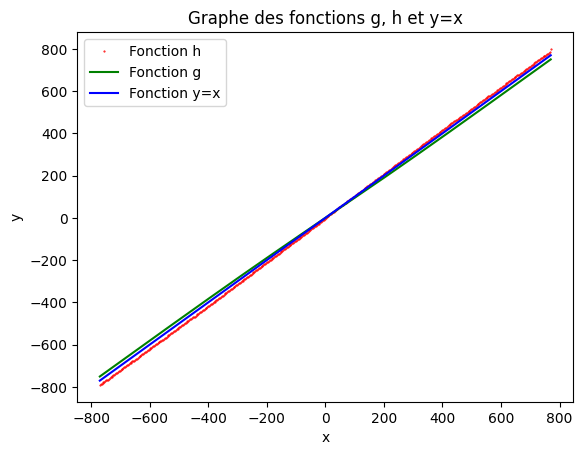

Erreur max : 0.0


In [7]:
# Plot des fonctions :

plt.plot(I, h(Y, X, I), 'r.', markersize = 1)   #Graphe de h discretisée
plt.plot(I, g(I, K), 'g')                       #Graphe de g
plt.plot(I, I, 'b')                             #Graphe de y=x
plt.title("Graphe des fonctions g, h et y=x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Fonction h","Fonction g","Fonction y=x"])
plt.show()

# Erreur entre (g o h)(x) et x :

print("Erreur max :", np.max(h(Y, X, g(X, K))-X))

In [58]:
## Méthode par simulation

# Fonction Fn (Fonction de répartition de la loi elo au rang n)

def matriceDn(Ri0, Rj0, K, p, N, T):
    D = np.zeros([T,N])
    for i in range(T):
        D[i] = Dn(Ri0, Rj0, K, p, N)
    D = np.transpose(D)
    return D

def F(d, Ri0, Rj0, K, p, N, T):
    Fn = []
    D = matriceDn(Ri0, Rj0, K, p, N, T)
    for n in range(N):
        Fn.append(np.sum(D[n] <= d[:, np.newaxis], axis=1)/T)
    return Fn

In [60]:
Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 10
T = 10000
d = np.linspace(-800, 800,T)

Fn = F(d, Ri0, Rj0, K, p, N, T)

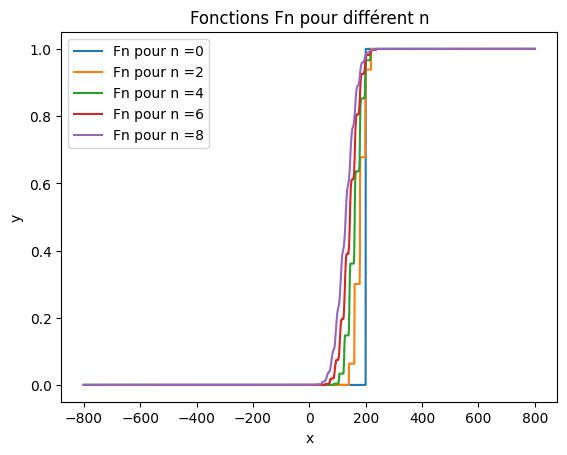

In [71]:
# Plot de Fn au rang n

Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 10
T = 10000
d = np.linspace(-800, 800,T)

Fn = F(d, Ri0, Rj0, K, p, N, T)

for n in np.arange(0,N,2):
    plt.plot(d, Fn[n])
plt.title("Fonctions Fn pour différent n")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Fn pour n =0","Fn pour n =2","Fn pour n =4","Fn pour n =6","Fn pour n =8"])
plt.show()

In [86]:
# Approximation de Fn à l'infini

def Rang(d, Ri0, Rj0, K, p, N, T):  #Recherche du n pour F_infini
    eps = 1E-2
    norm = []
    infini = None
    Fn = F(d, Ri0, Rj0, K, p, N, T)
    for n in range(N-1):
        diff = abs(Fn[n] - Fn[n+1])
        if np.max(diff) < eps:
            print("n =", n, "| Erreur entre  :", np.max(diff),' <', eps)
            infini = n
            break
        else:
            print("n =", n, "| Norme infini :", np.max(diff))
        norm.append(np.max(diff))
    plt.plot(np.linspace(0,len(norm)-1,len(norm)), norm, '.')
    plt.plot(np.linspace(0,len(norm)-1,len(norm)), np.ones(len(norm))*np.min(norm))
    plt.title("Graphe des erreurs entre F_n et F_n+1")
    plt.xlabel("Nombre de matchs n")
    plt.ylabel("Valeur des erreurs")
    plt.legend(["Nuage de points des erreurs","Erreur minimale"])
    plt.show()
    print("Min des normes infini de F_n - F_n+1 :", np.min(norm))
    if infini is not None: 
        r = infini  # On récupère le premier rang pour lequel la condition est satisfaite
        return r
    else:
        print("Pas de n infini trouvé")

n = 0 | Norme infini : 0.7523
n = 1 | Norme infini : 0.4414
n = 2 | Norme infini : 0.3426
n = 3 | Norme infini : 0.2881
n = 4 | Norme infini : 0.2591
n = 5 | Norme infini : 0.22220000000000006
n = 6 | Norme infini : 0.1794
n = 7 | Norme infini : 0.14259999999999995
n = 8 | Norme infini : 0.1104
n = 9 | Norme infini : 0.08970000000000006
n = 10 | Norme infini : 0.08369999999999994
n = 11 | Norme infini : 0.07130000000000003
n = 12 | Norme infini : 0.06560000000000005
n = 13 | Norme infini : 0.05560000000000004
n = 14 | Norme infini : 0.05829999999999996
n = 15 | Norme infini : 0.0514
n = 16 | Norme infini : 0.045499999999999985
n = 17 | Norme infini : 0.048199999999999965
n = 18 | Norme infini : 0.04590000000000005
n = 19 | Norme infini : 0.03949999999999998
n = 20 | Norme infini : 0.03620000000000001
n = 21 | Norme infini : 0.033399999999999985
n = 22 | Norme infini : 0.039500000000000035
n = 23 | Norme infini : 0.03420000000000001
n = 24 | Norme infini : 0.02969999999999995
n = 25 | N

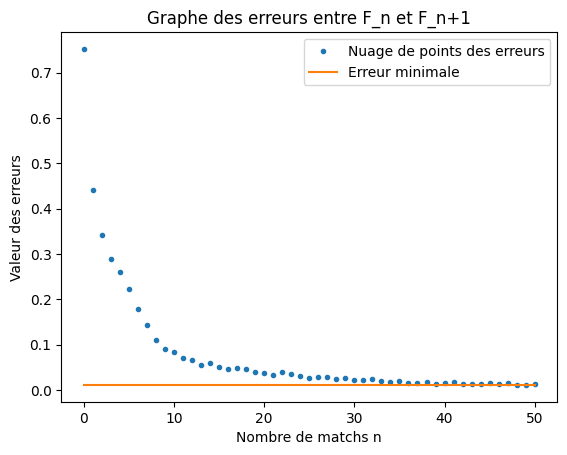

Min des normes infini de F_n - F_n+1 : 0.01090000000000002
51


In [87]:
#Plot du n limite

Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 100
T = 10000
d = np.linspace(-800,800,T)

print(Rang(d, Ri0, Rj0, K, p, N, T))

In [ ]:
# Erreur entre Fn et Finfini

def ErreurFninfini(d, Ri0, Rj0, K, p, N, T):    #Erreur entre F n et F_infini
    eps = 1E-2
    ninfini = Rang(d, Ri0, Rj0, K, p, N, T)
    Finfini = F(d, Ri0, Rj0, K, p, N, T, ninfini)
    e = []
    for n in range(20):
        Fn = F(d, Ri0, Rj0, K, p, N, T, n)
        if np.max(abs(Fn - Finfini)) < eps :
            print("n =", n, " | Erreur entre F n et F_infini :", np.max(abs(Fn - Finfini)), " <", eps)
            e.append(np.max(abs(Fn - Finfini)))
        else :
            print("n =", n, " | Erreur entre F n et F_infini :", np.max(abs(Fn - Finfini)))
            e.append(np.max(abs(Fn - Finfini)))
    plt.plot(np.linspace(0,len(e)-1,len(e)), e, '.')
    plt.title("Graphe des erreurs entre F_n et F_infini")
    plt.xlabel("Nombre de matchs n")
    plt.ylabel("Valeur des erreurs")
    plt.legend(["Nuage de points des erreurs"])
    plt.show()
    return e , ninfini

In [ ]:
# Plot de l'erreur entre Fn et Finfini

Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 200
T = 1000
d = np.linspace(-800,800,T)

print(ErreurFninfini(d, Ri0, Rj0, K, p, N, T))

In [ ]:
# Vitesse de convergence

# Méthode log-log

def TauxCVloglog(d, Ri0, Rj0, K, p, N, T):  #Ordre de la méthode
    e = ErreurFninfini(d, Ri0, Rj0, K, p, N, T)[0]
    y = np.zeros(len(e))
    x = np.zeros(len(e))
    for i in range(len(e)):
        y[i] = np.log(e[i])
        x[i] = np.log(i+1)
    #Méthode des moindres carrés
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    r = np.zeros(len(x))
    for i in range(len(x)):
        r[i] = m*x[i]+c
    plt.plot(x,y,'.')
    plt.plot(x,r)
    plt.title("Méthode log-log et droite des moindres carrés")
    plt.xlabel("ln(n)")
    plt.ylabel("ln(e_n)")
    plt.legend(["Nuage de points des log des erreurs","Droite des moindres carrés"])    
    print("Pente de la droite :", m," donc ordre = ",-m)
    print("Coefficient de corrélation :", np.corrcoef(x, y)[0,1])


Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 200
T = 1000
d = np.linspace(-800,800,T)

print(TauxCVloglog(d, Ri0, Rj0, K, p, N, T))

In [ ]:
# Méthode log-semilog

def TauxCVlogsemilog(d, Ri0, Rj0, K, p, N, T):
    e = ErreurFninfini(d, Ri0, Rj0, K, p, N, T)[0]
    y = np.zeros(len(e))
    x = np.arange(len(y))
    for i in range(len(e)):
        y[i] = np.log(e[i])
    X = x[1:]
    Y = y[1:]

    plt.semilogy(X, Y, '.')

    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
    r = m*X + c

    plt.plot(X, r)

    plt.title("Méthode log-semilog et droite des moindres carrés")
    plt.xlabel("n")
    plt.ylabel("ln(e_n)")
    plt.legend(["Nuage de points des log des erreurs", "Droite des moindres carrés"])
    plt.show()

    return -m, np.corrcoef(x, y)[0, 1]

Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 100
T = 1000
d = np.linspace(-800, 800, T)

pente, correlation = TauxCVlogsemilog(d, Ri0, Rj0, K, p, N, T)
print("Pente de la droite :", pente)
print("Coefficient de corrélation :", correlation)

In [ ]:
# Coefficient de corrélation :

def CoeffCorr(d, Ri0, Rj0, K, p, N, T):
    coeffcorr = []
    for ninfini in range(20,30):
        print("Pour ninifini =",ninfini)
        e = []
        for n in range(ninfini):
            eps = 1E-2
            Finfini = F(d, Ri0, Rj0, K, p, N, T, ninfini)
            Fn = F(d, Ri0, Rj0, K, p, N, T, n)
            if np.max(abs(Fn - Finfini)) < eps :
                print("n =", n, " | Erreur :", np.max(abs(Fn - Finfini)), " <", eps)
                e.append(np.max(abs(Fn - Finfini)))
            else :
                print("n =", n, " | Erreur :", np.max(abs(Fn - Finfini)))
                e.append(np.max(abs(Fn - Finfini)))
        y = e
        x = np.arange(0,len(y))
        coeffcorr.append(np.corrcoef(x, y)[0,1])
        print("Coefficient de corrélation :",np.corrcoef(x, y)[0,1])
    return np.mean(coeffcorr)   

#On trouve un coefficient de corrélation qui ne varie pas
#Et très proche de -1, c'est-à-dire, presque une corrélation linéaire parfaite négative.

Ri0 = 1500
Rj0 = 1500
K = 20
p = 0.5
N = 100
T = 1000
d = np.linspace(-800,800,T)

print(CoeffCorr(d, Ri0, Rj0, K, p, N, T))

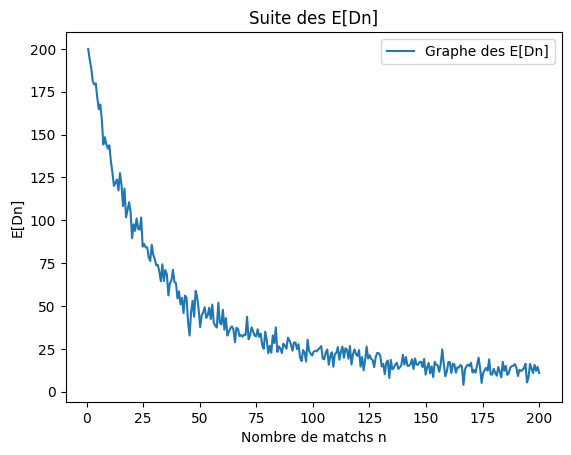

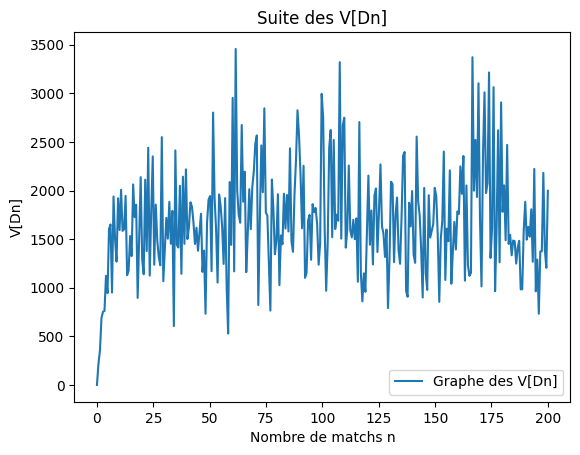

In [28]:
# Espérance et variance de Dn

def SuiteEspDn(Ri0, Rj0, K, p, N, T):  # Espérance de Dn au rang n
    ED = []
    E = []
    for n in range(N):
        ED = np.mean(matriceDn(Ri0, Rj0, K, p, N, T)[:n])
        E.append(ED)
    return E


def SuiteVarDn(Ri0, Rj0, K, p, N, T):  # Variance de Dn au rang n
    VD = []
    V = []
    for n in range(N):
        VD = np.var(matriceDn(Ri0, Rj0, K, p, N, T)[n])
        V.append(VD)
    return V


Ri0 = 1400
Rj0 = 1200
K = 20
p = 0.5
N = 300
T = 20
n=5
X = np.linspace(0,200,N)

E = SuiteEspDn(Ri0, Rj0, K, p, N, T)

V = SuiteVarDn(Ri0, Rj0, K, p, N, T)


plt.plot(X,E)
plt.title("Suite des E[Dn]")
plt.xlabel("Nombre de matchs n")
plt.ylabel("E[Dn]")
plt.legend(["Graphe des E[Dn]"])

plt.show()

plt.plot(X,V)
plt.title("Suite des V[Dn]")
plt.xlabel("Nombre de matchs n")
plt.ylabel("V[Dn]")
plt.legend(["Graphe des V[Dn]"])

plt.show()

In [ ]:
# Estimation de E[Dinfini]

def RangEDn(Ri0, Rj0, K, p, N, T):  #Recherche du n pour E[D_infini]
    eps = 0.15
    T = SuiteEspDn(Ri0, Rj0, K, p, N, T)[1]
    p = [10,10,10,10,10,10,10,10,10]
    for j in range(N-1):
        print("Test intervalle [",j,",",N-1,"]")
        #MMC
        e = T[j:]
        x = np.arange(len(e))
        A = np.vstack([x, np.ones(len(x))]).T
        m = np.linalg.lstsq(A, e, rcond=None)[0][0]
        p.append(abs(m)) #On rajoute une nouvelle pente à la liste des pentes
        print("Moyenne des pentes :", abs(np.mean(p)))
        print(p)
        print("\n")
        if abs(np.mean(p)) < eps :
            return j , np.max(e) , np.min(e)
        else :
            p = p[1:] #On enlève la pente la plus ancienne

# On remarque que E[Dinfini] = O

Ri0 = 1400
Rj0 = 1200
K = 20
p = 0.5
N = 100
T = 20


plt.plot(SuiteEspDn(Ri0, Rj0, K, p, N, T)[0],SuiteEspDn(Ri0, Rj0, K, p, N, T)[1])
plt.plot(SuiteEspDn(Ri0, Rj0, K, p, N, T)[0],RangEDn(Ri0, Rj0, K, p, N, T)[1]*np.ones(N),'.r', markersize = 0.2)
plt.plot(SuiteEspDn(Ri0, Rj0, K, p, N, T)[0],RangEDn(Ri0, Rj0, K, p, N, T)[2]*np.ones(N),'.r', markersize = 0.2)
plt.title("Suite des E[Dn]")
plt.xlabel("Nombre de matchs n")
plt.ylabel("E[Dn]")
plt.legend(["Graphe des E[Dn]","Majorant à partir d'un certain rang n","Minorant à partir d'un certain rang n"])

n infini = 50
n = 0  | Erreur : nan
n = 1  | Erreur : 200.0
n = 2  | Erreur : 195.80506146704084
n = 3  | Erreur : 190.01107467883
n = 4  | Erreur : 181.64298419818385
n = 5  | Erreur : 179.24414307906503
n = 6  | Erreur : 177.26877925491237
n = 7  | Erreur : 170.94872809863628
n = 8  | Erreur : 165.96649869754842
n = 9  | Erreur : 156.66693818144915
n = 10  | Erreur : 160.93289805507422
n = 11  | Erreur : 158.20452418041063
n = 12  | Erreur : 154.4702191257548
n = 13  | Erreur : 145.98026720338274
n = 14  | Erreur : 142.55080302334818
n = 15  | Erreur : 140.65737185932116
n = 16  | Erreur : 140.7789812978088
n = 17  | Erreur : 134.26748577028002
n = 18  | Erreur : 126.05735034614511
n = 19  | Erreur : 128.37246581786212
n = 20  | Erreur : 124.92556907641773
n = 21  | Erreur : 119.46796594984067
n = 22  | Erreur : 114.91558404675396
n = 23  | Erreur : 113.95011933137766
n = 24  | Erreur : 109.41276132676033
n = 25  | Erreur : 108.22454412738801
n = 26  | Erreur : 108.6500364934818
n = 

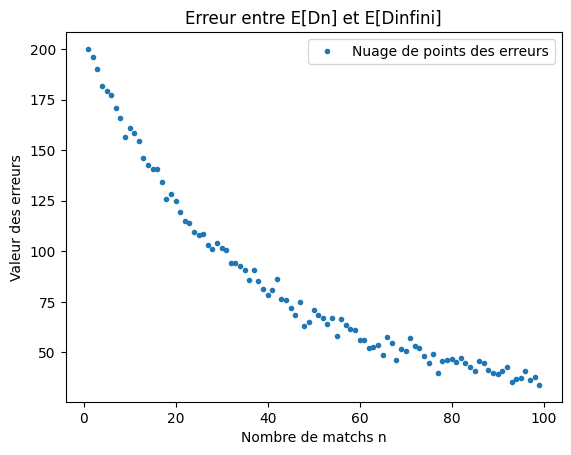

In [34]:
# Erreur entre E[Dn] et E[Dinfini]

def ErreurEDninf(Ri0, Rj0, K, p, N, T):     #Erreur entre E[Dn] et E[Dinfini]
    eps = 1E-3
    ninfini = 50 #RangEDn(Ri0, Rj0, K, p, N, T)
    print("n infini =",ninfini)
    E = SuiteEspDn(Ri0, Rj0, K, p, N, T)
    EDinfini = 0
    e = []
    for n in range(100):
        EDn = E[n]
        if np.max(abs(EDn - EDinfini)) < eps :
            print("n =", n, " | Erreur :", np.max(abs(EDn - EDinfini)), " <", eps)
            e.append(np.max(abs(EDn - EDinfini)))
        else :
            print("n =", n, " | Erreur :", np.max(abs(EDn - EDinfini)))
            e.append(np.max(abs(EDn - EDinfini)))
    return e

Ri0 = 1200
Rj0 = 1000
K = 20
p = 0.5
N = 100
T = 50

plt.plot(np.arange(100),ErreurEDninf(Ri0, Rj0, K, p, N, T),'.')
plt.title("Erreur entre E[Dn] et E[Dinfini]")
plt.xlabel("Nombre de matchs n")
plt.ylabel("Valeur des erreurs")
plt.legend(["Nuage de points des erreurs"])
plt.show()

In [ ]:
# Vitesse de convergence de E[Dn]

#Méthode log-log

def TauxCVloglogDn(Ri0, Rj0, K, p, N, T):       #Ordre de la méthode
    e = ErreurEDninf(Ri0, Rj0, K, p, N, T)
    y = np.zeros(len(e))
    x = np.zeros(len(e))
    for i in range(len(e)):
        y[i] = np.log(e[i])
        x[i] = np.log(i+1)
    Y = y[1:]
    X = x[1:]
    #Méthode des moindres carrés
    y = Y
    x = X
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    r = np.zeros(len(x))
    for i in range(len(x)):
        r[i] = m*x[i]+c
    plt.figure()
    plt.plot(x,y,'.')
    plt.plot(x,r)
    plt.title("Méthode log-log et droite des moindres carrés")
    plt.xlabel("ln(n)")
    plt.ylabel("ln(e_n)")
    plt.legend(["Nuage de points des log des erreurs","Droite des moindres carrés"])
    print("Pente de la droite :", m," donc ordre = ",-m)
    print("Coefficient de corrélation :", np.corrcoef(x, y)[0,1])

Ri0 = 1600
Rj0 = 1200
K = 20
p = 0.5
N = 100
T = 10

print(TauxCVloglogDn(Ri0, Rj0, K, p, N, T))

In [ ]:
def TauxCVlogsemilogDn(Ri0, Rj0, K, p, N, T):
    e = ErreurEDninf(Ri0, Rj0, K, p, N, T)
    y = np.zeros(len(e))
    x = np.arange(len(y))
    for i in range(len(e)):
        y[i] = np.log(e[i])
    X = x[1:]
    Y = y[1:]

    plt.semilogy(X, Y, '.')

    A = np.vstack([X, np.ones(len(X))]).T
    m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
    r = m*X + c

    plt.plot(X, r)

    plt.title("Méthode log-semilog et droite des moindres carrés")
    plt.xlabel("n")
    plt.ylabel("ln(e_n)")
    plt.legend(["Nuage de points des log des erreurs", "Droite des moindres carrés"])
    plt.show()
    return -m, np.corrcoef(x, y)[0, 1]


Ri0 = 1600
Rj0 = 1200
K = 20
p = 0.5
N = 100
T = 50

print(TauxCVlogsemilogDn(Ri0, Rj0, K, p, N, T))

In [ ]:
# Comparaison entre E[b(Dn)] et b[E(Dn)]

def EbDn(Ri0, Rj0, K, p, N, T):  #E[b(Dn)]
    S = []
    Dn = matriceDn(Ri0, Rj0, K, p, N, T)
    for n in range(N-1):
        S.append(np.mean(b(Dn[n])))
    return S

def bEDn(Ri0, Rj0, K, p, N, T):  #b[E(Dn)]
    b = []
    S = SuiteEspDn(Ri0, Rj0, K, p, N, T)
    for n in range(N-1):
        b.append(S[n])
    return b

Ri0 = 1200
Rj0 = 1400
K = 20
p = 0.7
N = 50
T = 50
X = np.arange(N-1)

plt.plot(X,EbDn(Ri0, Rj0, K, p, N, T))
plt.plot(X,bEDn(Ri0, Rj0, K, p, N, T))
plt.title("Graphe de E[b(Dn)] et b[E(Dn)]")
plt.xlabel("Nombre de matchs n")
plt.legend(["E[b(Dn)]","b[E(Dn)]"])
plt.show()

In [112]:
# Erreur entre E[b(Dn)] et b(E[Dn])

def ErreurEBetBE(Ri0, Rj0, K, p, N, T):
    E = []
    for n in range(N):
        E.append(abs(EbDn(Ri0, Rj0, K, p, N, T, n)-bEDn(Ri0, Rj0, K, p, N, T, n)))
    return E


Ri0 = 1200
Rj0 = 1400
K = 20
p = 0.7
N = 100
T = 50
n = 5
e = ErreurEBetBE(Ri0, Rj0, K, p, N, T)

plt.plot(np.arange(len(e)),e,'.')
plt.title("Erreur entre E[b(Dn)] et b(E[Dn])")
plt.xlabel("Nombre de matchs n")
plt.ylabel("Valeur des erreurs")
plt.legend(["Nuage de points des erreurs"])
plt.show()

print("Erreur max :",np.max(e))

In [113]:
# Densité et répartition de Fn

def densitenormale(x,mu,sigma):
    return stats.norm.pdf(x,mu,sigma)

def repartnormale(x,mu,sigma):
    return stats.norm.cdf(x,mu,sigma)

In [ ]:
#Plot de la densité de Dn et de la loi normale

Ri0 = 1200
Rj0 = 1400
K = 20
p = 0.5
N = 100
T = 50
n = 5

mu = SuiteEspDn(Ri0, Rj0, K, p, N, T)[n]
sigma = np.sqrt(SuiteVarDn(Ri0, Rj0, K, p, N, T)[n])
D = matriceDn(Ri0, Rj0, K, p, N, T)[n]
I1=np.linspace(mu-3*sigma,mu+3*sigma,N)     #intervalle pour représenter 99,7% des données

print('mu:',mu,'sigma:',sigma)
print("Comparaion avec une loi normale N(",mu,",",sigma,")")
plt.figure()
plt.hist(D, bins = 100, density = True)
plt.plot(I1,densitenormale(I1,mu,sigma))
plt.title("Comparaison de la densité de Dn et de la loi normale")
plt.xlabel("x")
plt.legend(["Densité de Dn","Densité de la loi normale"])
plt.show()

In [ ]:
#Plot de la répartition de Dn et de la loi normale


I2 = np.linspace(-400, 400, T)
Ri0 = 1200
Rj0 = 1400
K = 20
p = 0.5
N = 100
T = 50
n = 5
mu = E(Ri0, Rj0, K, p, N, T, n)
sigma = np.sqrt(V(Ri0, Rj0, K, p, N, T, n))

plt.figure()
plt.plot(I2,0.5*np.ones(T), '.b', markersize = 0.01)
plt.plot(mu*np.ones(T),np.linspace(0, 1, T), '.b', markersize = 0.01)
plt.plot(I2, F(I2, Ri0, Rj0, K, p, N, T, n), 'g', linewidth = 3)
plt.plot(I2,repartnormale(I2,mu,sigma),'r')
plt.title("Comparaison entre Fn et la répartition de la loi normale")
plt.xlabel("x")
plt.legend(["","","Fn","Répartition de la loi normale"])
plt.show()

In [ ]:
#Erreur entre Fn et la fonction de répartition de la loi normale

def ErreurNormale(d, Ri0, Rj0, K, p, N, T):
    e = []
    for n in range(1,N):
        Fn = F(d, Ri0, Rj0, K, p, N, T, n)
        mu = E(Ri0, Rj0, K, p, N, T, n)
        sigma = np.sqrt(V(Ri0, Rj0, K, p, N, T, n))
        Fnormale = repartnormale(d,mu,sigma)
        e.append(np.max(abs(Fn - Fnormale)))
    return e


d = np.linspace(-800, 800, T)
Ri0 = 1200
Rj0 = 1400
K = 20
p = 0.5
N = 100
T = 50
n = 5
e = ErreurNormale(d, Ri0, Rj0, K, p, N, T)

plt.plot(np.arange(len(e)),e,'.')
plt.title("Erreur entre Fn et fonction de répartition de la loi normale")
plt.xlabel("Nombre de matchs n")
plt.legend(["Nuage de points des erreurs"])
plt.show()
